   null  branch                  
0    21      79  SIRwhiteN_forced
1    43      57    SIRenvN_forced
2    57      43    SIRdemN_forced
3    50      50       SEIR_forced
4    97       3    SIRwhiteN_null
5   100       0      SIRenvN_null
6    98       2      SIRdemN_null
7    97       3         SEIR_null
   fold  hopf  branch  null                  
0    51     1      45     3  SIRwhiteN_forced
1    24    11      57     8    SIRenvN_forced
2    27     1      68     4    SIRdemN_forced
3    25     1      67     7       SEIR_forced
4    41     0       8    51    SIRwhiteN_null
5    36     9       6    49      SIRenvN_null
6    68     1      16    15      SIRdemN_null
7    68     1      16    15         SEIR_null


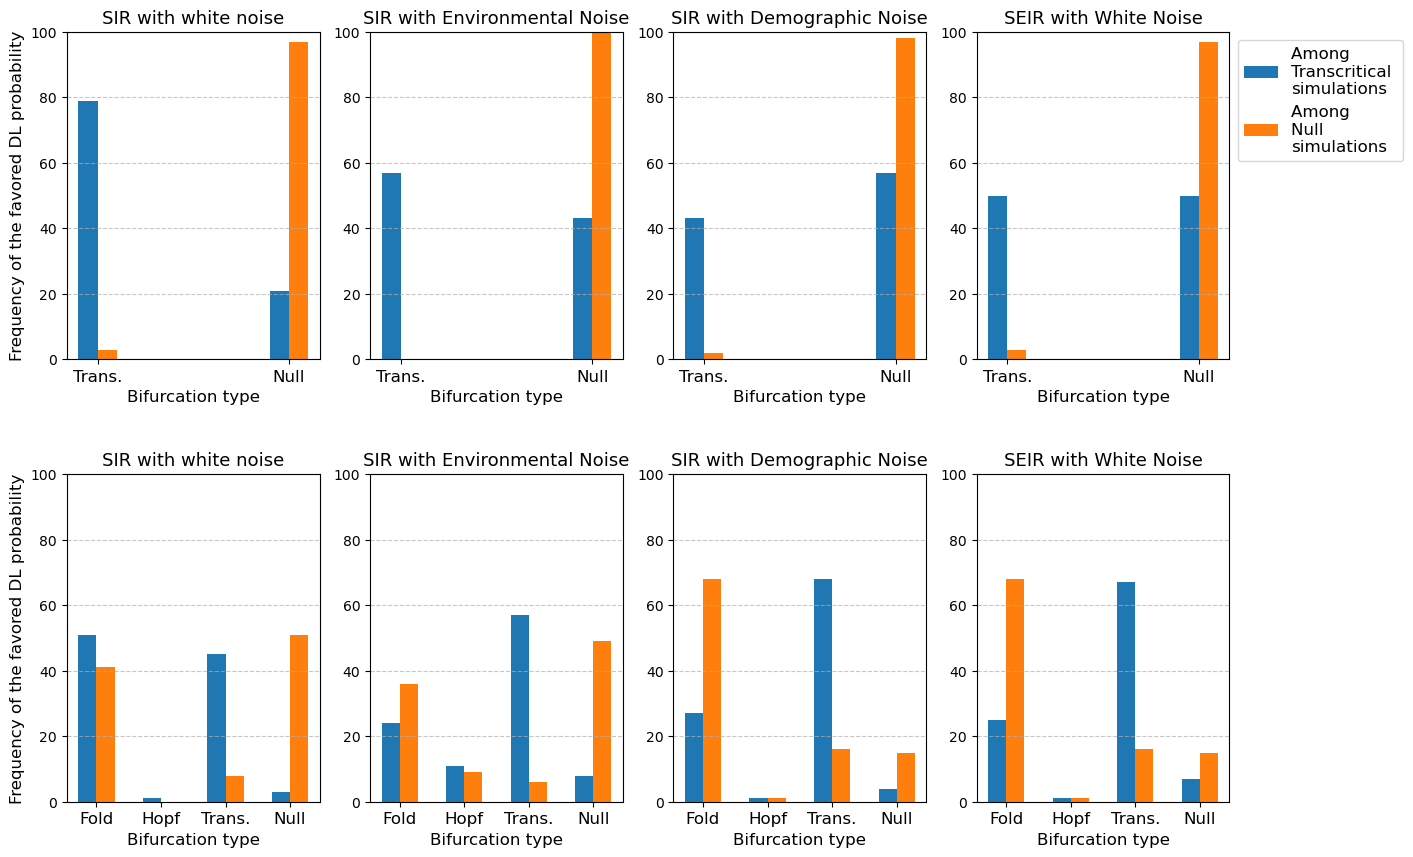

In [4]:
'''
Barplot of last 20% frequency of the test models observed from 
the output of SIR data trained model and Bury et al trained model.
Shown in figure-4.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import scipy.stats as stats
import os


#import save data of frequency
df = pd.DataFrame()
df_Bury = pd.DataFrame()

test_models = ['SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR']
types = ['forced', 'null']

for type in types: 
    for test_model in test_models: 
        df_temp = pd.read_csv(r'../data/roc/df_bif_pred_counts_{}_late_SIR_trained_{}.csv'.format(type, test_model)) 
        df_temp[''] = test_model + '_' + type
        df = pd.concat([df, df_temp], ignore_index=True)

for type in types: 
    for test_model in test_models: 
        df_temp = pd.read_csv(r'../data/roc/df_bif_pred_counts_{}_Bauch_late_{}.csv'.format(type, test_model)) 
        df_temp[''] = test_model + '_' + type
        df_Bury = pd.concat([df_Bury, df_temp], ignore_index=True)

print(df)
print(df_Bury)


df.drop(df.iloc[:, 2:3], inplace=True, axis=1)
df = df[['branch', 'null']]

df_Bury.drop(df_Bury.iloc[:, 4:5], inplace=True, axis=1)


### plot SIR model output frequency
plt.figure(figsize=(15, 10))
bar_width = 0.10

X = ['Trans.','Null'] 
index = np.arange(len(X)) 
  
plt.subplot(241)
plt.bar(index - bar_width/2, df.iloc[0], bar_width, label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df.iloc[4], bar_width, label = 'Among Null simulations') 
plt.xticks(index, X, fontsize=12) 
plt.xlabel('Bifurcation type', fontsize=12)
plt.ylabel('Frequency of the favored DL probability', fontsize=12)
plt.title('SIR with white noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X)
plt.ylim(0, 100)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(242)
plt.bar(index - bar_width/2, df.iloc[1], bar_width, label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df.iloc[5], bar_width, label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=12)
# plt.ylabel('Frequency')
plt.title('SIR with Environmental Noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=12)
plt.ylim(0, 100)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(243)
plt.bar(index - bar_width/2, df.iloc[2], bar_width, label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df.iloc[6], bar_width, label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=12)
# plt.ylabel('Frequency')
plt.title('SIR with Demographic Noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=12)
plt.ylim(0, 100)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(244)
plt.bar(index - bar_width/2, df.iloc[3], bar_width, label = 'Among \nTranscritical \nsimulations') 
plt.bar(index + bar_width/2, df.iloc[7], bar_width, label = 'Among \nNull \nsimulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=12)
# plt.ylabel('Frequency')
plt.title('SEIR with White Noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=12)
plt.ylim(0, 100)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)


## plot Bury et al model output frequency
# plt.figure(figsize=(15, 5))
bar_width = 0.28

X = ['Fold', 'Hopf', 'Trans.','Null'] 
index = np.arange(len(X)) 
  
plt.subplot(245)
plt.bar(index - bar_width/2, df_Bury.iloc[0], bar_width, label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[4], bar_width, label = 'Among Null simulations') 
plt.xticks(index, X, fontsize=12) 
plt.xlabel('Bifurcation type', fontsize=12)
plt.ylabel('Frequency of the favored DL probability', fontsize=12)
plt.title('SIR with white noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X)
plt.ylim(0, 100)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(246)
plt.bar(index - bar_width/2, df_Bury.iloc[1], bar_width, label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[5], bar_width, label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=12)
# plt.ylabel('Frequency')
plt.title('SIR with Environmental Noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=12)
plt.ylim(0, 100)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(247)
plt.bar(index - bar_width/2, df_Bury.iloc[2], bar_width, label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[6], bar_width, label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=12)
# plt.ylabel('Frequency')
plt.title('SIR with Demographic Noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=12)
plt.ylim(0, 100)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

plt.subplot(248)
plt.bar(index - bar_width/2, df_Bury.iloc[3], bar_width, label = 'Among transcritical simulations') 
plt.bar(index + bar_width/2, df_Bury.iloc[7], bar_width, label = 'Among Null simulations') 
plt.xticks(index, X) 
plt.xlabel('Bifurcation type', fontsize=12)
# plt.ylabel('Frequency')
plt.title('SEIR with White Noise', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(index, X , fontsize=12)
plt.ylim(0, 100)

plt.subplots_adjust(hspace=0.35)


plt.savefig(r'../data/figures/fig-4-freq-last-20per.png', bbox_inches = 'tight')